# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pickle
import h5py
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
df = pd.read_csv("dataset\diabetes.csv")

# Data Exploration

In [3]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# EDA and visualization

In [9]:
outcome_counts = df['Outcome'].value_counts()

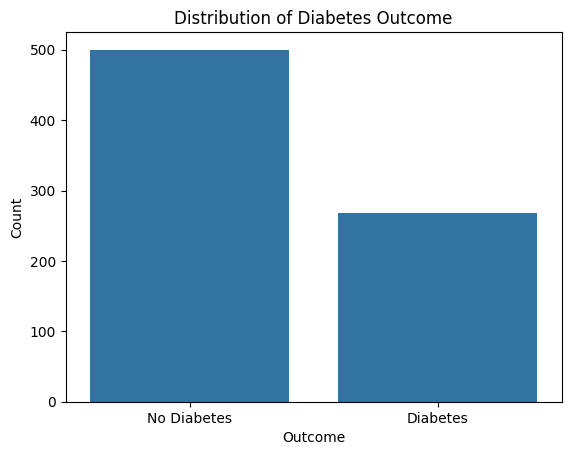

In [10]:
sns.barplot(x = outcome_counts.index, y = outcome_counts.values)

plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels = ['No Diabetes','Diabetes'])

plt.show()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


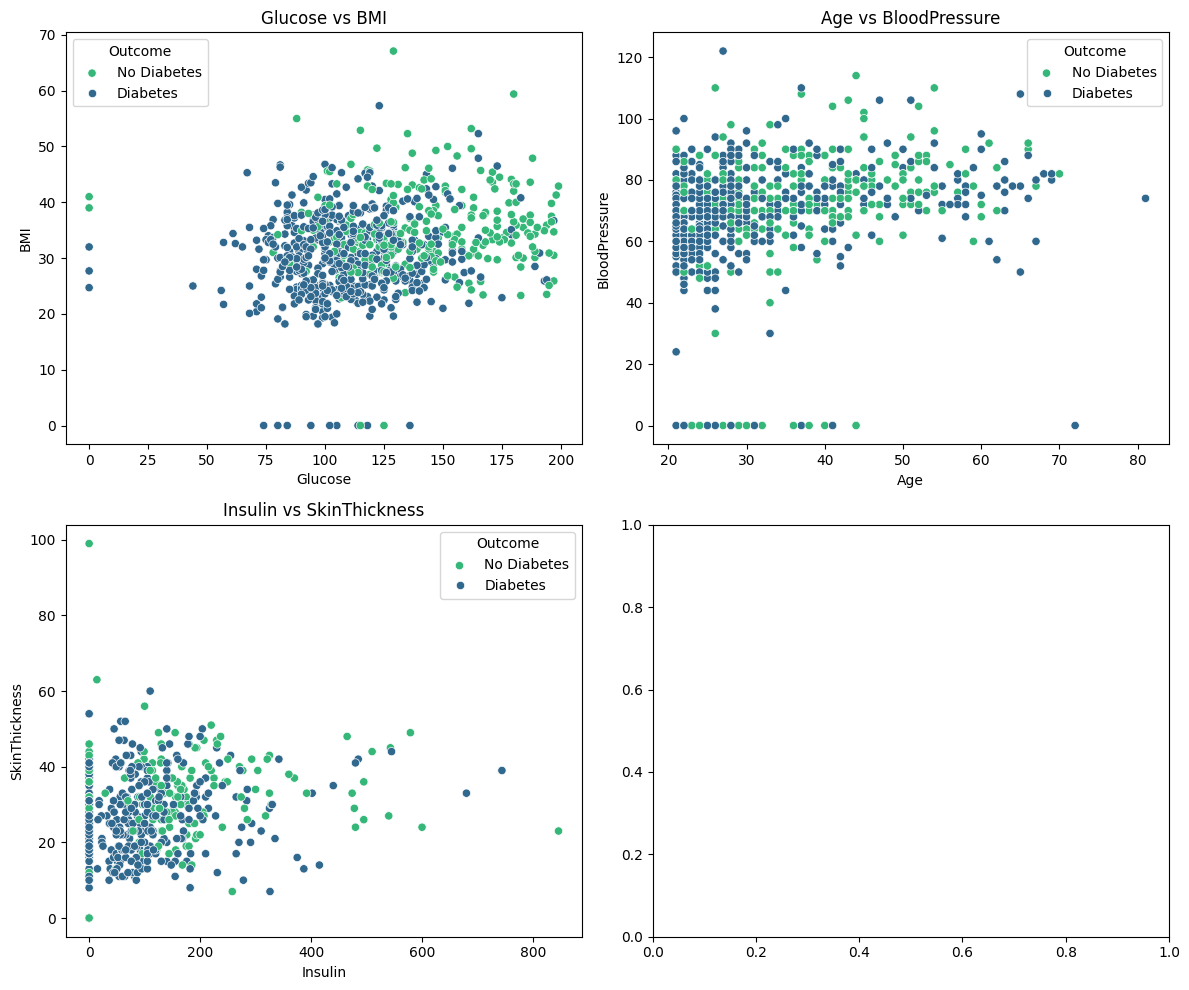

In [12]:
# Define the feature pairs you want to plot
feature_pairs = [('Glucose', 'BMI'), ('Age', 'BloodPressure'), ('Insulin', 'SkinThickness')]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create scatter plots for each pair
for i, (feature_x, feature_y) in enumerate(feature_pairs):
    sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='Outcome', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature_x} vs {feature_y}')
    axes[i].set_xlabel(feature_x)
    axes[i].set_ylabel(feature_y)
    axes[i].legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])

# Adjust layout and spacing
plt.tight_layout()
plt.show()

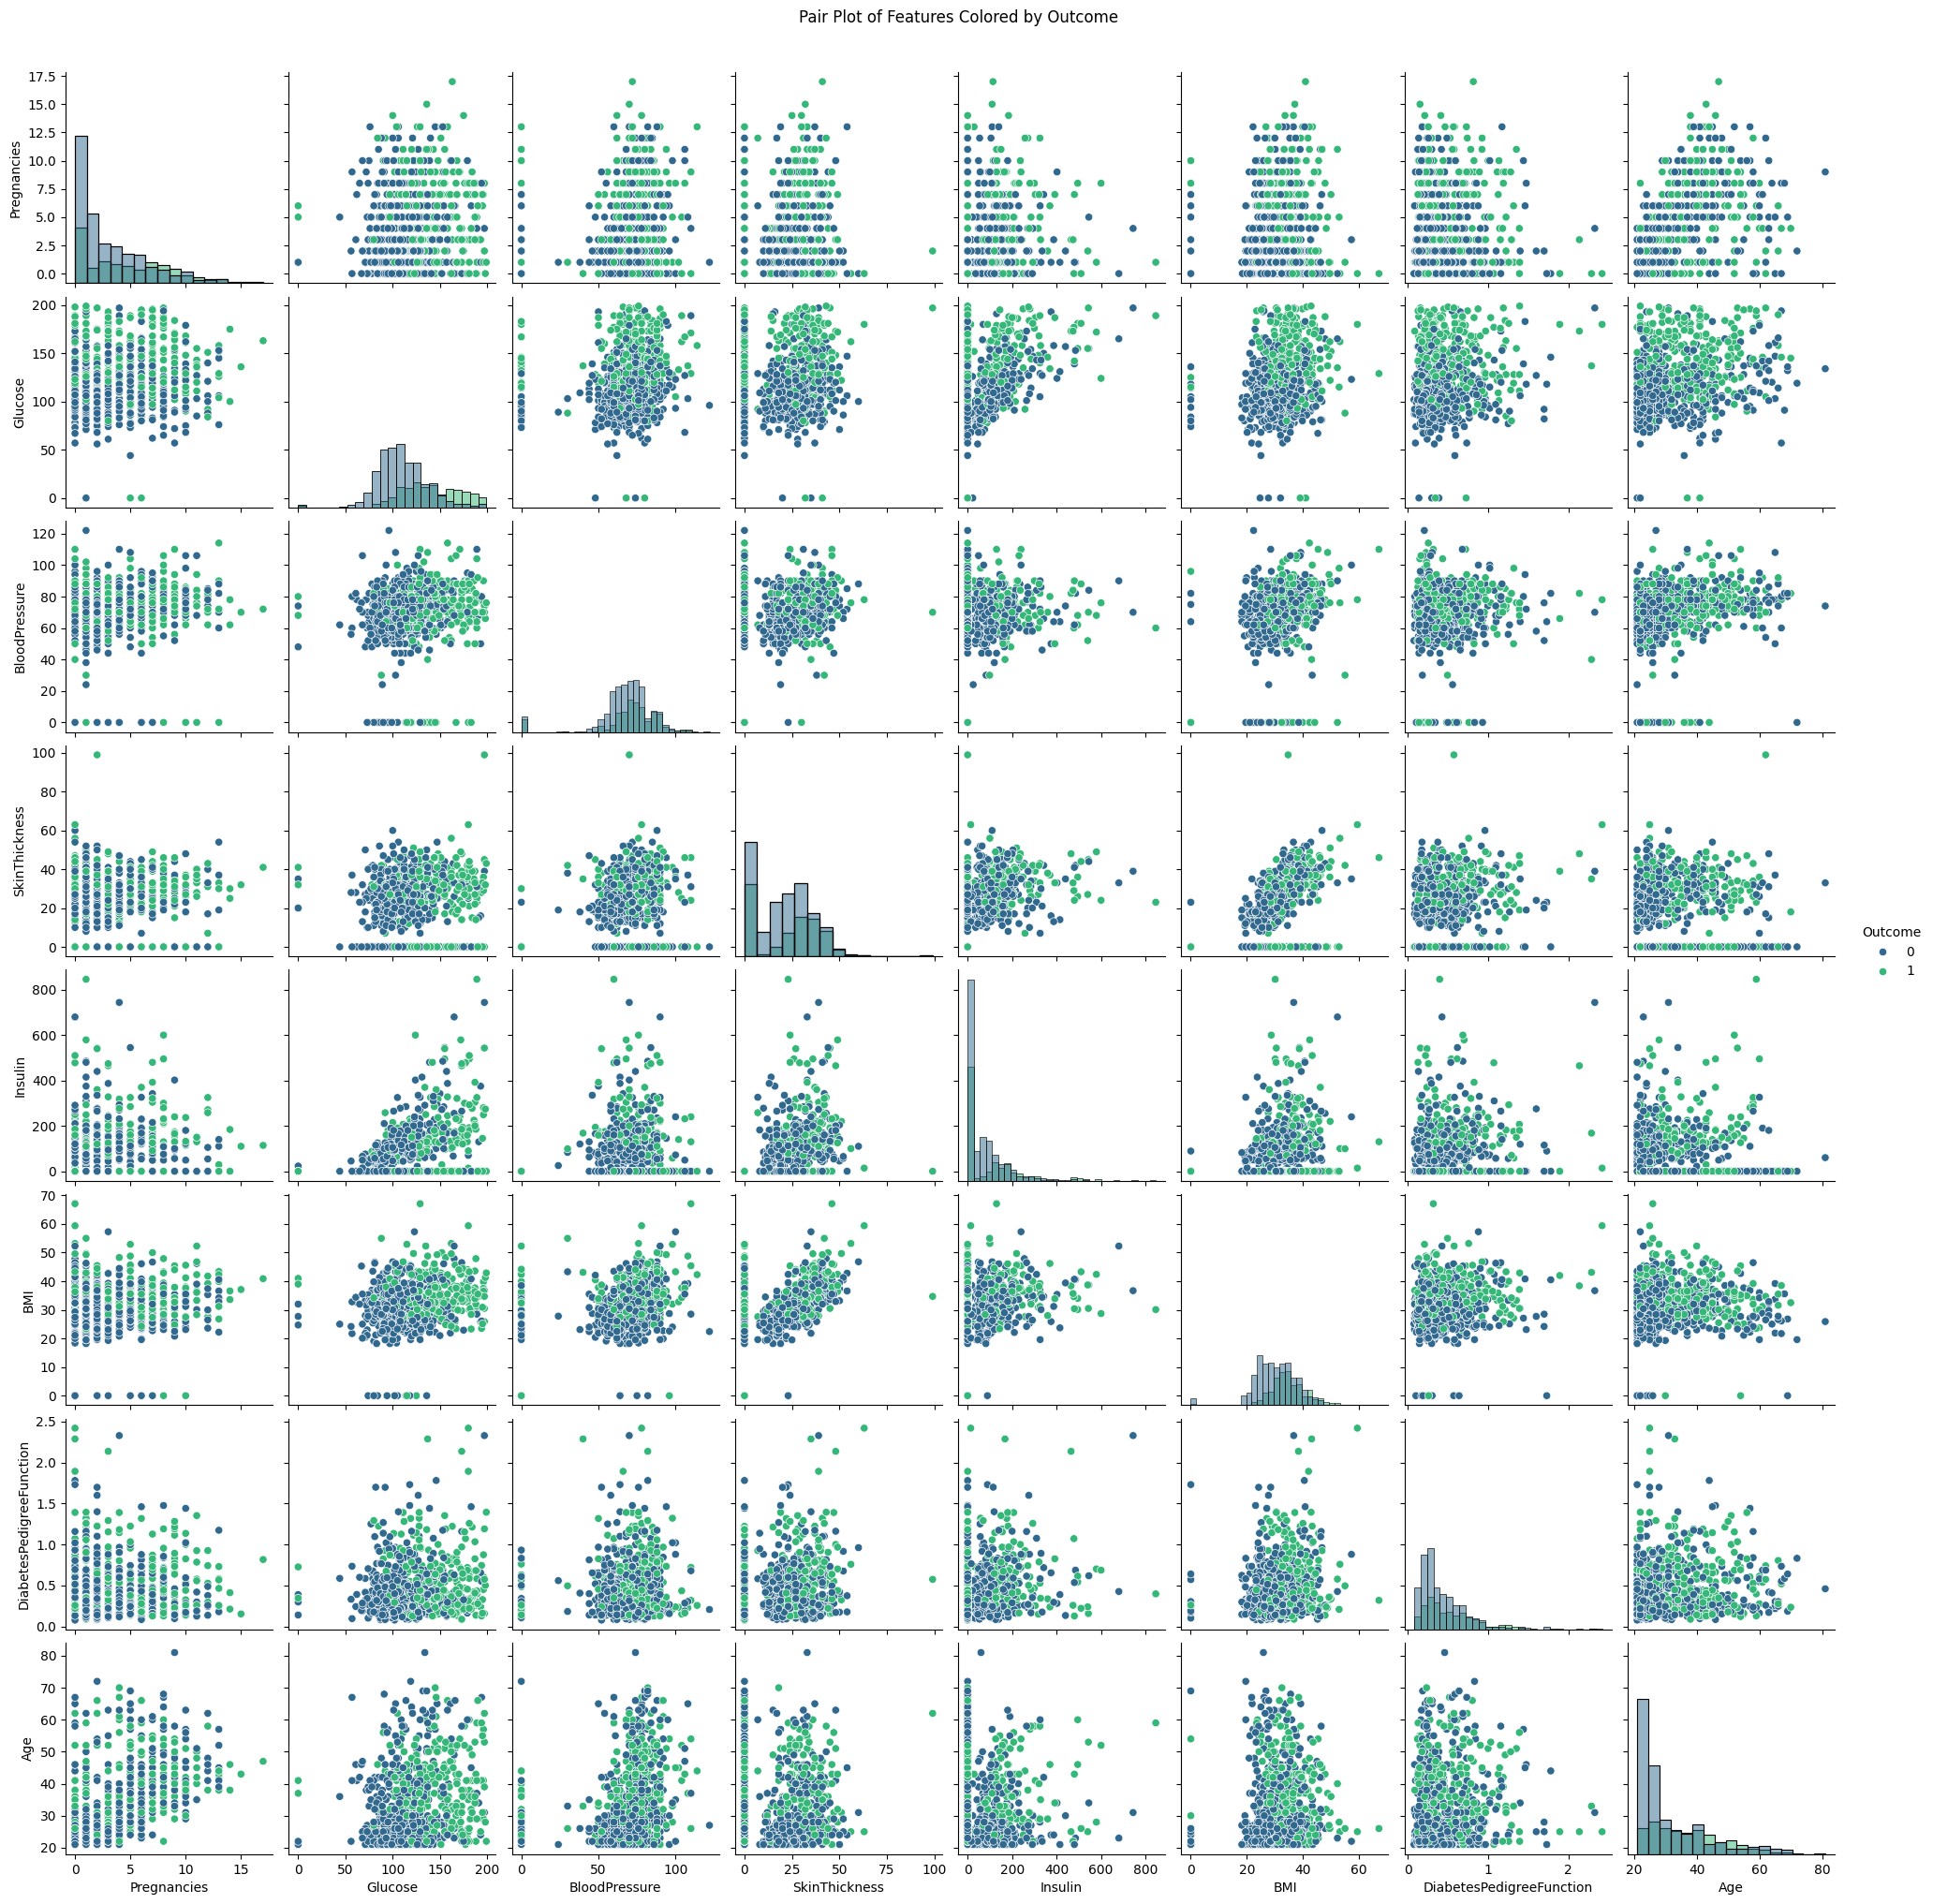

In [13]:
pairplot = sns.pairplot(df, hue='Outcome', palette='viridis', diag_kind='hist')
pairplot.fig.suptitle('Pair Plot of Features Colored by Outcome', y=1.02)
pairplot.savefig('images/pair_plot.png') 
plt.show()

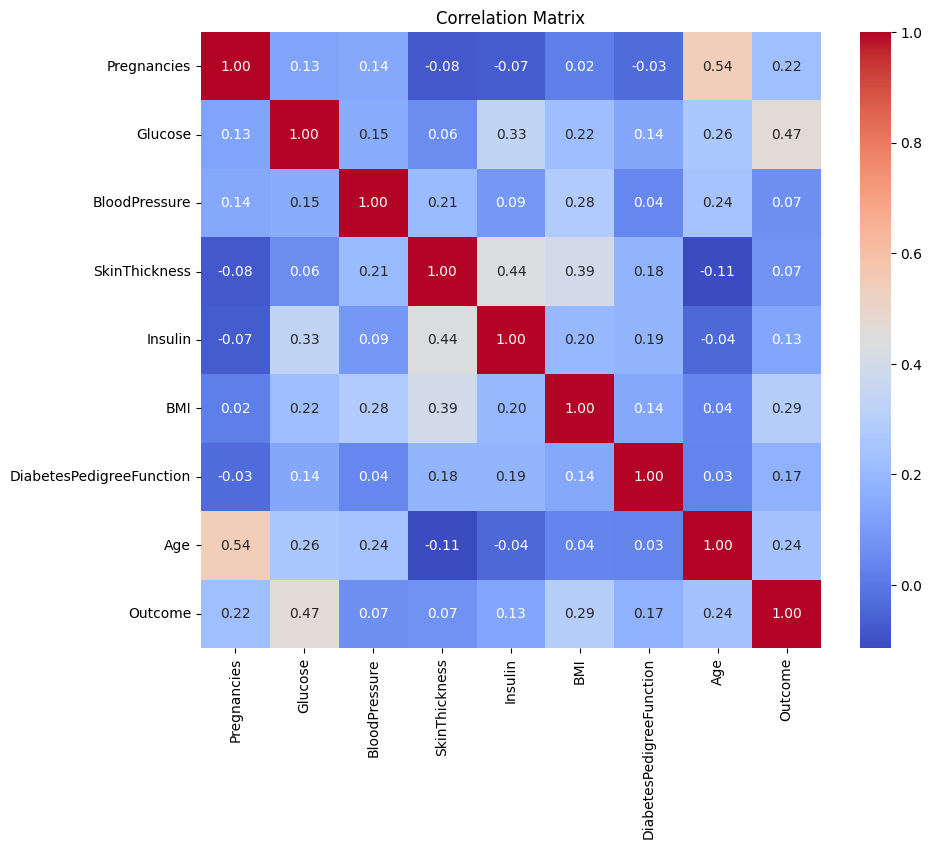

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('images/correlation_matrix.png')  
plt.show()

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


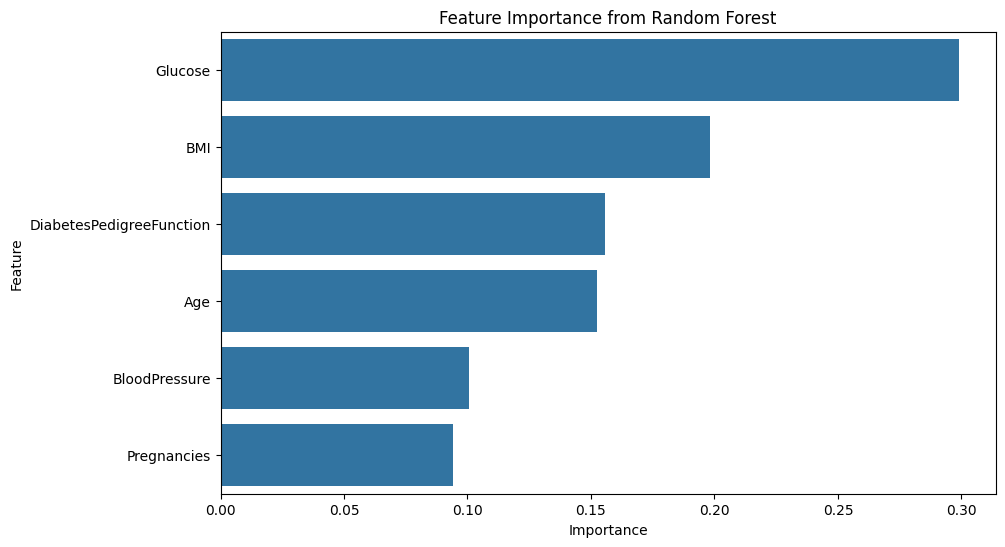

In [16]:
# Split the data into features and target
X = df.drop(columns=['Outcome', 'Insulin', 'SkinThickness'])
y = df['Outcome']

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [17]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
# df.corr()

In [19]:
X = df.drop(['Outcome','Insulin','SkinThickness'], axis=1)
y = df['Outcome']  # Target
imputer = SimpleImputer(missing_values=0, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [20]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [21]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [24]:
print(f'KNN Metrics:')
print(f'Accuracy: {accuracy_knn:.2f}')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1-score: {f1_knn:.2f}')

KNN Metrics:
Accuracy: 0.75
Precision: 0.65
Recall: 0.65
F1-score: 0.65


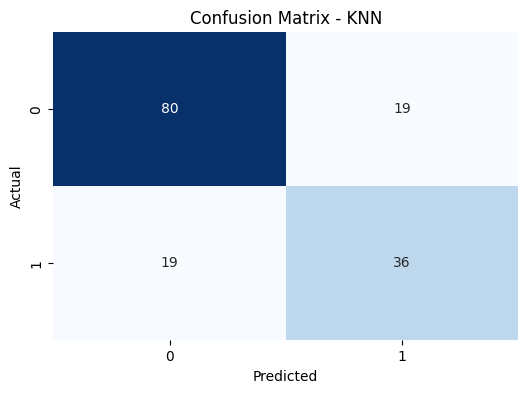

In [25]:
plot_confusion_matrix(y_test, y_pred_knn, title='Confusion Matrix - KNN')

In [26]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [28]:
print(f'Random Forest Metrics:')
print(f'Accuracy: {accuracy_rf:.2f}')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')

Random Forest Metrics:
Accuracy: 0.78
Precision: 0.68
Recall: 0.71
F1-score: 0.70


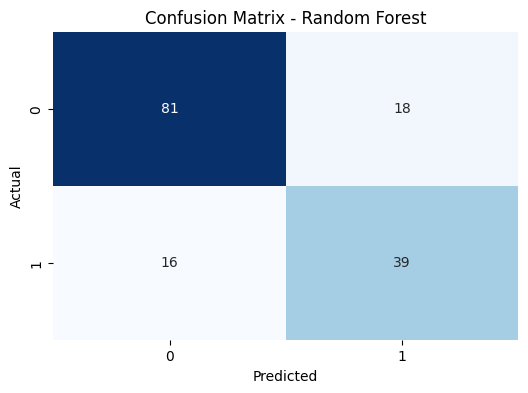

In [29]:
plot_confusion_matrix(y_test, y_pred_rf, title='Confusion Matrix - Random Forest')

In [30]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:

# Predictions
y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

In [32]:
print(f'Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_lr:.2f}')
print(f'Precision: {precision_lr:.2f}')
print(f'Recall: {recall_lr:.2f}')
print(f'F1-score: {f1_lr:.2f}')

Logistic Regression Metrics:
Accuracy: 0.76
Precision: 0.67
Recall: 0.64
F1-score: 0.65


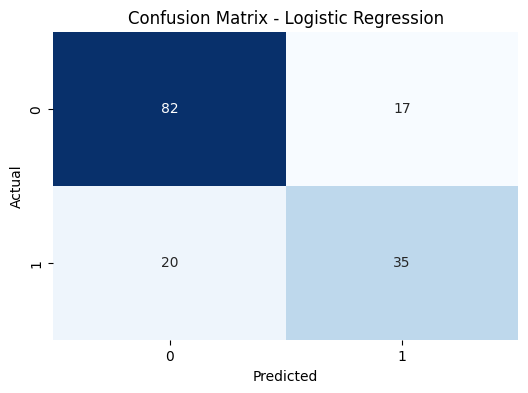

In [33]:
# Confusion matrix
plot_confusion_matrix(y_test, y_pred_lr, title='Confusion Matrix - Logistic Regression')

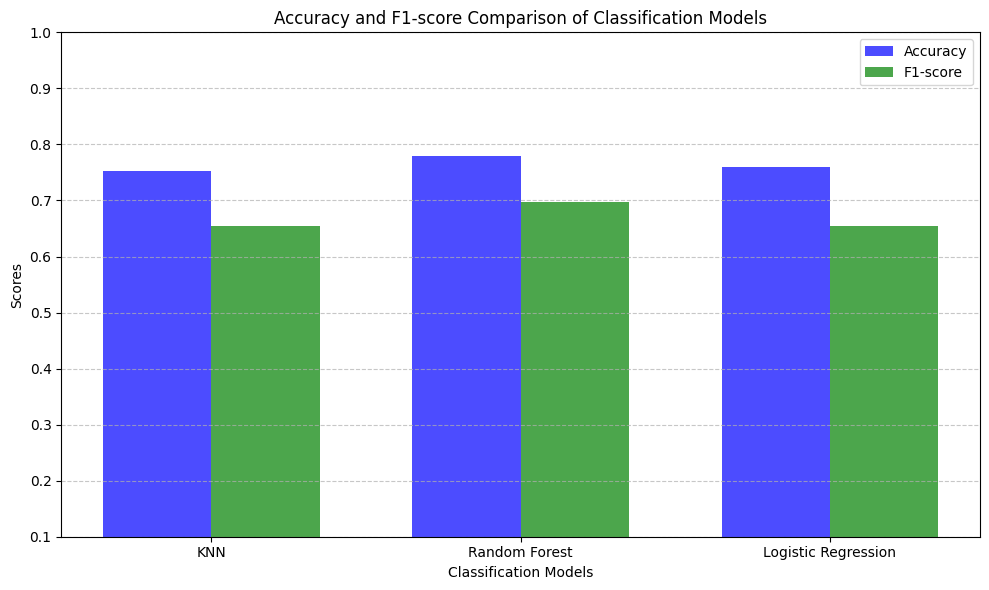

In [34]:
accuracy_scores = [accuracy_knn, accuracy_rf, accuracy_lr]
f1_scoress = [f1_knn,f1_rf,f1_lr]
models = ['KNN', 'Random Forest', 'Logistic Regression']

bar_width = 0.35

# Positions of bars on x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

# Plot bars for accuracy scores
plt.bar(r1, accuracy_scores, width=bar_width, color='blue', alpha=0.7, label='Accuracy')
# Plot bars for F1-scores
plt.bar(r2, f1_scoress, width=bar_width, color='green', alpha=0.7, label='F1-score')

# Add labels, legend, and title
plt.xlabel('Classification Models')
plt.ylabel('Scores')
plt.title('Accuracy and F1-score Comparison of Classification Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)
plt.ylim([0.1, 1.0])  # Adjust the y-axis limits if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

### Conclusion

After training and evaluating the K-Nearest Neighbors (KNN), Random Forest, and Logistic Regression models on the diabetes dataset, their performance was compared based on accuracy and F1-score metrics.

1. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 0.75
   - **Precision**: 0.65
   - **Recall**: 0.65
   - **F1-score**: 0.65

2. **Random Forest**:
   - **Accuracy**: 0.78
   - **Precision**: 0.68
   - **Recall**: 0.71
   - **F1-score**: 0.70

3. **Logistic Regression**:
   - **Accuracy**: 0.76
   - **Precision**: 0.67
   - **Recall**: 0.64
   - **F1-score**: 0.65

From the comparison, it is evident that:
- **Random Forest** performs the best with an accuracy of 0.78 and an F1-score of 0.70.
- **Logistic Regression** also shows strong performance with an accuracy of 0.76 and the highest F1-score of 0.65.
- **K-Nearest Neighbors (KNN)** lags behind with lower accuracy (0.75) and F1-score (0.65).

Therefore, based on these evaluation metrics, the **Logistic Regression** model is recommended as the best choice for predicting diabetes in this dataset due to its balanced performance in accuracy and F1-score metrics.


In [35]:
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [36]:
model_h5_path = 'random_forest_model.h5'
with h5py.File(model_h5_path, 'w') as h5_file:
    model_byte_stream = pickle.dumps(rf)
    h5_file.create_dataset('random_forest_model', data=np.void(model_byte_stream))